# 히스토그램
- 영상을 구성하는 픽셀들의 빈도수를 측정하여 그래프(히스토그램)으로 표현
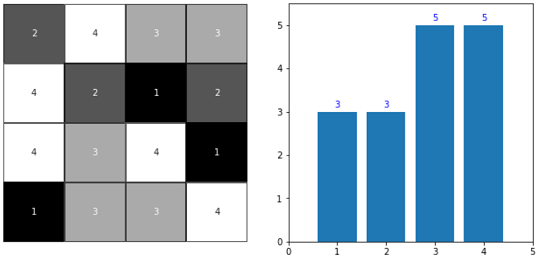

- **`cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)**
    - images: 히스토그램을 구할 입력영상 리스트
    - channels: 히스토그램을 구할 채널 리스트
    - mask: 마스크 영상. 영상전체일 경우 None지정
    - histSize: 히스토그램 각 채널의 bin의 개수 리스트
    - ranges: 히스토그램 각 채널의 최솟값과 최대값 리스트

In [2]:
import cv2
import matplotlib.pyplot as plt

lenna_gray = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE: 흑백모드읽기.
lenna_gray.shape, 512*512

((512, 512), 262144)

In [3]:
hist = cv2.calcHist([lenna_gray],  #히스토그램을 계산할 이미지(ndarray) - 리스트
                    [0], #채널 지정
                    None, #마스크 영상, None-전체대상.
                    [256], #bin개수
                    [0, 256], # 값의 범위 - 0 ~ 256
                   )

In [5]:
type(hist), hist.shape

(numpy.ndarray, (256, 1))

In [7]:
# hist[:5]
hist[100:110]

array([[1894.],
       [1932.],
       [1956.],
       [1836.],
       [1762.],
       [1729.],
       [1612.],
       [1504.],
       [1434.],
       [1367.]], dtype=float32)

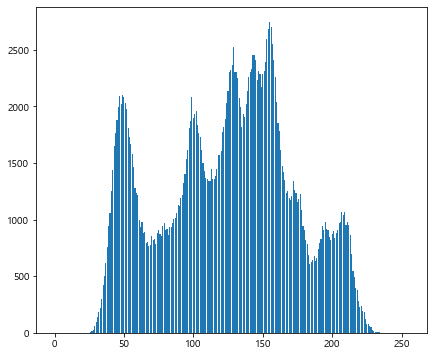

In [10]:
import numpy as np
plt.figure(figsize=(7,6))
plt.bar(np.arange(hist.size), hist.flatten())
plt.show()

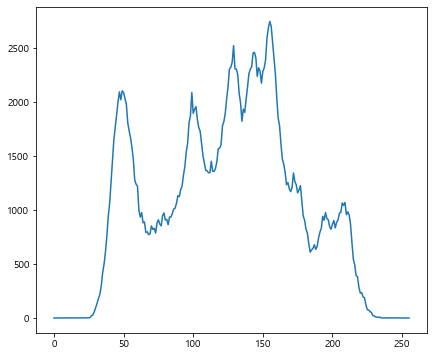

In [11]:
plt.figure(figsize=(7,6))
plt.plot(np.arange(hist.size), hist.flatten())
plt.show()

In [13]:
cv2.imshow('img',lenna_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 컬러 이미지의 histogram 
# - 채널별로 따로 그린다.

In [14]:
lenna = cv2.imread('images/lenna.bmp')
color_label = ['blue', 'green', 'red']
# 채널 분리
bgr_channel = cv2.split(lenna)
type(bgr_channel)

list

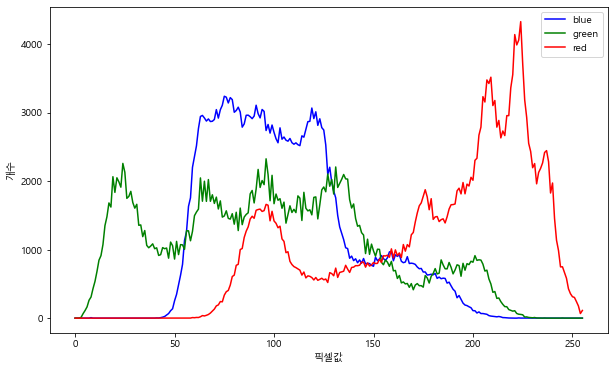

In [16]:
plt.figure(figsize=(10,6))
for channel, color in zip(bgr_channel, color_label):
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    plt.plot(np.arange(hist.size), hist.flatten(), color=color, label=color)

plt.legend()
plt.xlabel('픽셀값')
plt.ylabel('개수')
plt.show()

In [20]:
# red 없애고 확인
lenna2 = lenna.copy()
lenna2[:,:,2] = 0
# lenna2

In [21]:
bgr_channel = cv2.split(lenna2)

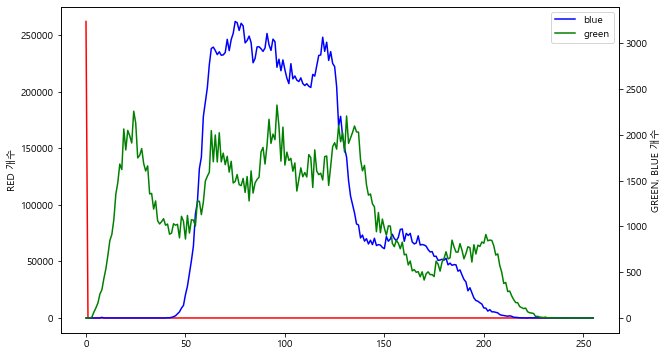

In [24]:
plt.figure(figsize=(10,6))
# twinx - x축 공유, y: red, (green,blue)
ax = plt.gca()
ax2 = ax.twinx()
for channel, color in zip(bgr_channel, color_label):
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    if color=='red':
        ax.plot(np.arange(hist.size), hist.flatten(), color=color, label=color)
    else:
        ax2.plot(np.arange(hist.size), hist.flatten(), color=color, label=color)

plt.legend()
ax.set_ylabel("RED 개수")
ax2.set_ylabel('GREEN, BLUE 개수')
plt.show()

In [25]:
cv2.imshow('lenna2', lenna2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 밝기 조절하기(brightness)
- 영상을 전체적으로 밝게 또는 어둡게 만드는 연산
- 밝기 조절 수식
    - 원본좌표(x,y) + n
    - n이 양수면 각 좌표의 픽셀값이 커지므로 밝아진다.
    - n이 음수이면 각 좌표의 픽셀값이 작아지므로 어두워 진다.
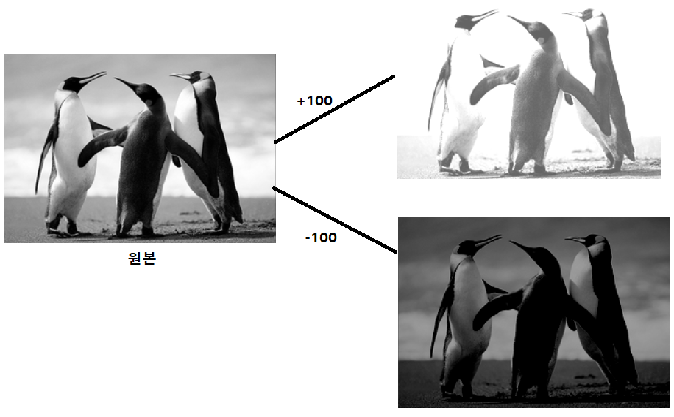
    
- **`cv2.add(src1, src2)`**
    - 밝기 조절이나 두 영상을 합치기에 사용할 수 있다.
    - src1: 첫번째 영상 또는 스칼라
    - src2: 두번째 영상 또는 스칼라
    - src2를 src1에 더한다.
- pixel에 스칼라 값을 더하거나 빼면 0 ~ 255의 범위를 넘어설 수 있다. ndarray의 type은 uint8(unsigned int8) 로 0 ~ 255범위를 넘어가는 숫자는 순환되어 버린다. 
    - 계산결과가 0이하가 되면 255로 부터 작아지게 되고 255가 넘어가면 0으로 가서 커지게 된다.
    - 그래서 cv2.add() 함수는 값이 순환되지 않도록 0이하의 값은 0으로 255이상의 값은 255가 되도록 처리한다. 이것을 **saturate연산**이라고 한다.

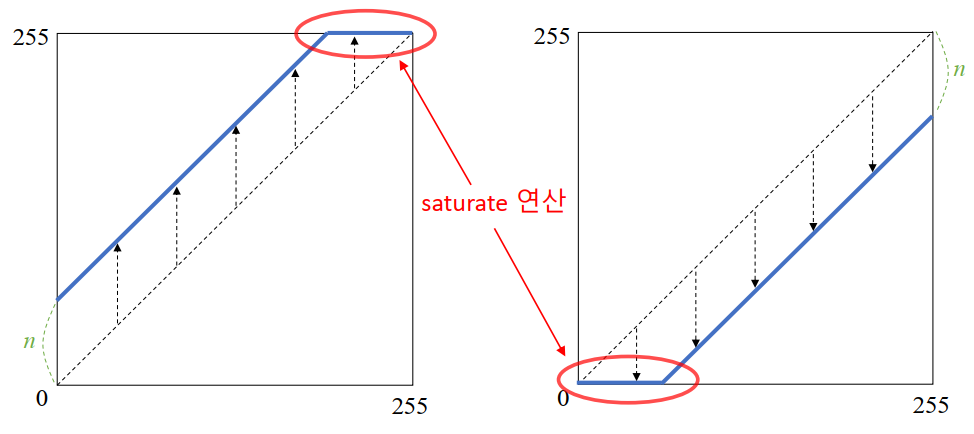

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 흑백
src = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.add(src, 100) #각 pixcel값들에 100을 더함. 계산결과가 0이하는 0, 255이상은 255 처리.
dst2 = cv2.add(src, -100)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

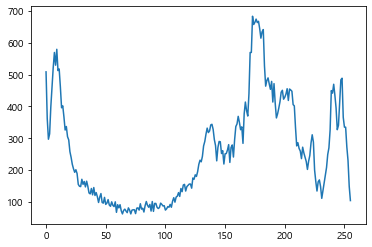

In [29]:
hist_src = cv2.calcHist([src], [0], None, [256], [0,256])
plt.plot(hist_src)
plt.show()

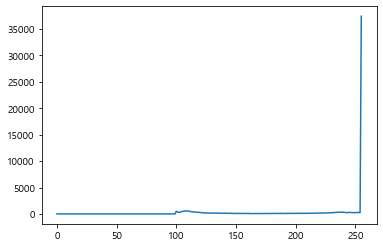

In [31]:
hist_dst1 = cv2.calcHist([dst1], [0], None, [256], [0,256])
plt.plot(hist_dst1)
plt.show()

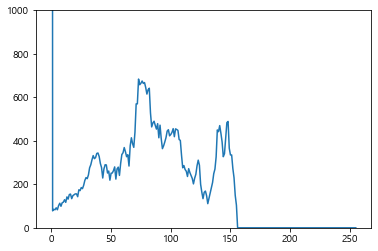

In [34]:
hist_dst2 = cv2.calcHist([dst2], [0], None, [256], [0,256])
plt.plot(hist_dst2)
# plt.ylim(0,1000)
plt.show()

In [48]:
# dst3 = src + 100 #src:uint8 (부호가 없는 정수 8bit - 0 ~ 255) - 계산결과가 255가 넘으면 결과-255, 0이하: 결과+255
dst3 = np.clip(src+100., 0, 255).astype(np.uint8) #cv2.add(src+100)
# dst3.dtype
# dst3.min(), dst3.max(), src.dtype
cv2.imshow("dst3", dst3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
np.clip([-20,10,300] , 0, 255)

array([  0,  10, 255])

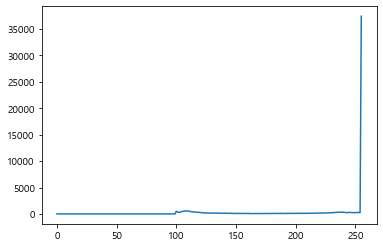

In [50]:
hist_dst3 = cv2.calcHist([dst3], [0], None, [256], [0,256])
plt.plot(hist_dst3)
# plt.ylim(0,1000)
plt.show()

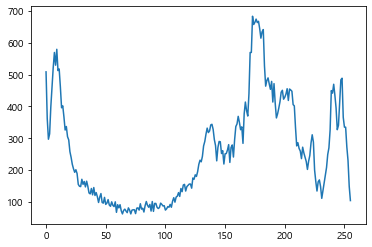

In [40]:
hist_src = cv2.calcHist([src], [0], None, [256], [0,256])
plt.plot(hist_src)
plt.show()

# =======5월4일 2교시 부터 명암비 ===========

# 명암비(Contrast) 조정

## 명암비/대비(Contrast)란
- 밝은 부분과 어두분 부분 사이의 밝기의 정도 차이
    - 영상이 전체적으로 밝은 픽셀들로만 구성되거나 어두운 픽셀들로만 구성되면 명암비가 낮다고 표현한다. 
    - 영상에 밝은 영역과 어두운 역역이 골고루 섞여있으면 명암비가 높다고 표현한다.
- 명암비가 낮으면 객체간의 구분이 되지 않아 흐릿한 느낌이 나고 명암비가 높으면 선명한 느낌이 든다.
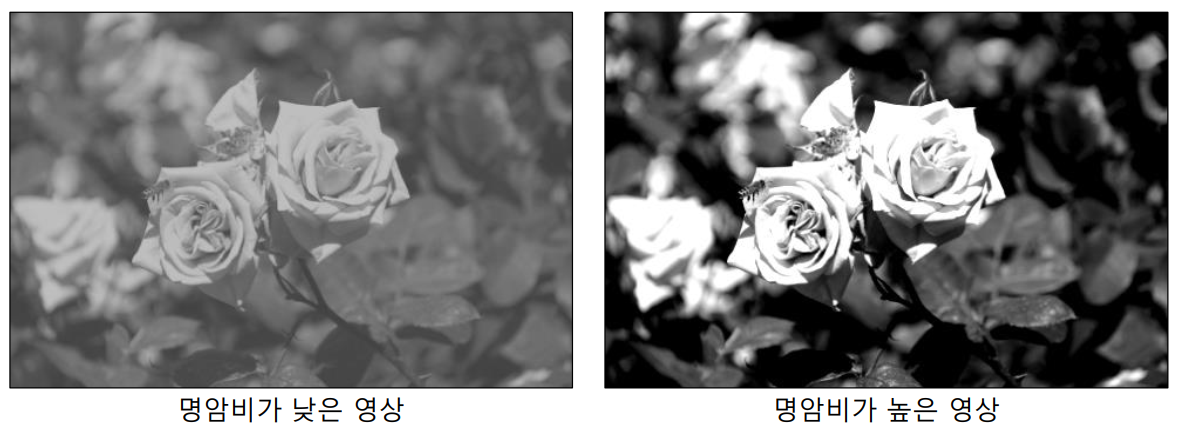

- 명암비를 변환하는 함수공식
$$
g(x, y)=f(x,y)+(f(x,y)-128) \alpha\\
==\\
(1+\alpha)f(x, y)-\alpha 128
$$

- $g$는 결과 image
- $f$는 원본 image
- $x$: x좌표
- $y$: y좌표
- $\alpha$: 대비를 조절하는 값. 
    - 0: 원본과 동일
    - 음수: 명암비를 낮춘다.
    - 양수: 명암비를 높인다.

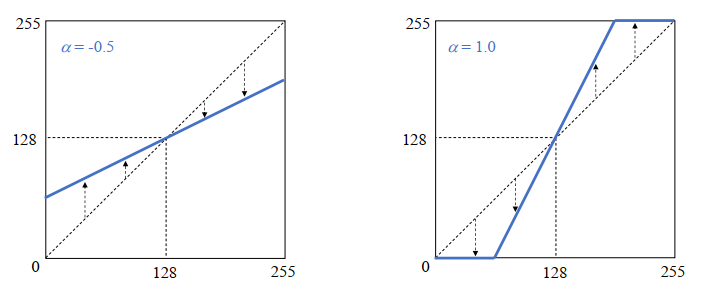

%%필기 
- 명암은 곱셈 연산한다. 
- 곱셈 연산시 문제점은? 
    - 대비를 크게 주고 싶어서 1이상 값을 곱하게 됨 --> 255가 넘어가는 부분이 생김 --> 조금밝은 애들은 거의 흰색으로 표현됨. 
    - 명암비를 줄이기 위해서 0.5 정도 곱했다고 해보자. --> 아무리커봐야 128 정도 수준으로 줄어든다. --> 전체적으로 어두운 이미지가 된다. 
- 이를 조절하기 위해서 나온 공식이다. ==> 명암비를 변환하는 함수 공식 
- 알파를 0 보다 작은 값 --> 대비를 낮추기 
- 알파를 0 보다 큰 값 --> 대비 높이기 
- 0이하 내려가는 부분, 255 넘어가는 부분은 ==> 클립조절 해야한다. 넘파이 클립이 필요하다. 
- 저렇게 구현되어 있는 함수는 없기 때문에 우리가 함수를 만들어서 작업을 해야한다. 

In [2]:
# 명암비를 변경하는 함수 : (1+𝛼)𝑓(𝑥,𝑦)−𝛼128 
def change_contrast(image, alpha=0.0):
#     image = image.astypte(np.float)
    return np.clip((1.0 + alpha)*image - 128*alpha, 0, 255).astype(np.uint8)

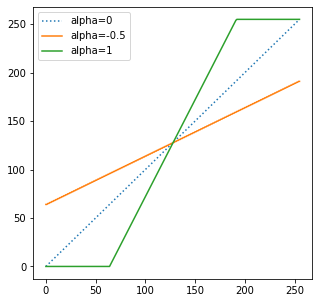

In [6]:
# 값 그래프 확인해보기 
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(256)
b1 = change_contrast(a)
b2 = change_contrast(a, -0.5) 
b3 = change_contrast(a, 1)

 
plt.figure(figsize=(5,5))
plt.plot(b1, linestyle=':', label='alpha=0')
plt.plot(b2, label='alpha=-0.5')
plt.plot(b3, label='alpha=1')
plt.legend()
plt.show()

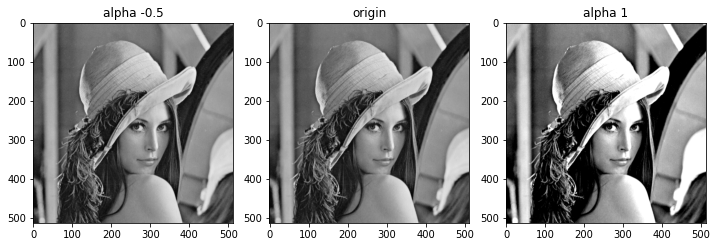

In [43]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 

lenna_gray = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)
lenna_alpha1 = change_contrast(lenna_gray, alpha=1.0)
lenna_alpha2 = change_contrast(lenna_gray, alpha=-0.5)

plt.figure(figsize=(10,10))
row, col = 1,3

plt.subplot(row, col, 1)
plt.imshow(lenna_alpha2, cmap='gray')
plt.title('alpha -0.5')

plt.subplot(row, col, 2)
plt.imshow(lenna_gray, cmap='gray')
plt.title('origin')

plt.subplot(row, col, 3)
plt.imshow(lenna_alpha1, cmap='gray')
plt.title('alpha 1')

plt.tight_layout()
plt.show()

%% 필기 
- 0보다 큰 값을 곱하면 --> 쨍한느낌 
- 0보다 작은 값을 곱하면 --> 혼탁한 느낌 

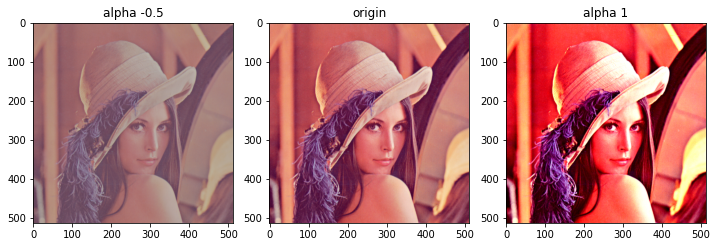

In [44]:
# color 로 봐보자 
lenna = cv2.imread('./images/lenna.bmp')
lenna_c_alpha1 = change_contrast(lenna, alpha = 1)
lenna_c_alpha2 = change_contrast(lenna, alpha = -0.5)

plt.figure(figsize = (10,10))
row, col = 1, 3

plt.subplot(row, col, 1)
plt.imshow(cv2.cvtColor(lenna_c_alpha2, cv2.COLOR_BGR2RGB))
plt.title('alpha -0.5')


plt.subplot(row, col, 2)
plt.imshow(cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB))
plt.title('origin')

plt.subplot(row, col, 3)
plt.imshow(cv2.cvtColor(lenna_c_alpha1, cv2.COLOR_BGR2RGB))
plt.title('alpha 1')



plt.tight_layout()
plt.show()

## 채도 (Saturation) 변환
- 채도: 색의 선명도를 말한다.
- 채도를 변환할 때는 HSV color 타입으로 변환한 뒤 S의 값을 바꾼다.
> HSV : 색상(Hue), 채도(Saturation), 명도(Value)

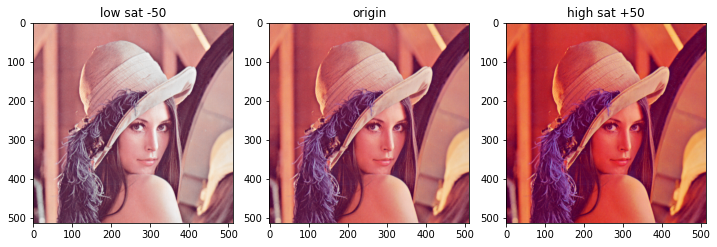

In [45]:
lenna = cv2.imread('./images/lenna.bmp')

# BRG모드에서 HSV모드로 변환 
lenna_hsv = cv2.cvtColor(lenna, cv2.COLOR_BGR2HSV)
lenna_hsv_low_sat = lenna_hsv.copy()
lenna_hsv_high_sat = lenna_hsv.copy()

# 함수 생성 : 
def change_statuation(image, sat):
    image = image.astype(np.float32)
    image[:,:,1] = np.clip(image[:,:,1]+sat , 0, 255) # 채도변환 
    image = image.astype(np.uint8)
    
    # HSV모드를 BGR모드로 변경하자 
    return cv2.cvtColor(image, cv2.COLOR_HSV2RGB) # matplotlib에서 출력하기 위해서 RGB모드로 변환 


lenna_rgb_low_sat = change_statuation(lenna_hsv_low_sat, -50)
lenna_rgb_high_sat = change_statuation(lenna_hsv_high_sat, 50)

plt.figure(figsize=(10,10))
row, col = 1, 3


plt.subplot(row, col, 1)
plt.imshow(lenna_rgb_low_sat)
plt.title('low sat -50')

plt.subplot(row, col, 2)
plt.imshow(lenna[:,:,::-1])
plt.title('origin')

plt.subplot(row, col, 3)
plt.imshow(lenna_rgb_high_sat)
plt.title('high sat +50')

plt.tight_layout()
plt.show()

In [33]:
# 채도 변경하는 것은 S값을 변경 : S + 정수(채도높이기) / S - 정수(채도낮추기) 
lenna_hsv_low_sat.shape # (height, width, cannael[색상, 채도, 명암])
lenna_hsv_low_sat[:,:,1] # 채도만빼기 
lenna_hsv_low_sat[:,:,1]+100 # --> 이부분을 함수로 만들자 : change_statusation

(512, 512, 3)

$ 필기 
- 채도를 낮추기 : 색이 빠진 느낌 , 
- 채도를 높이기 : 색이 진한 느낌 , 붉은기가 더 진해짐 

# Filter 

## Filtering 개요
- 영상에서 필요한 정보만 통과시키고 필요없는 정보는 걸러내는 작업을 말한다.
- N x N행렬을 영상과 Convolution연산(Correlation연산)을 하여 처리한다.
    - 영상과 연산하는 N x N 행렬을 커널(Kernel), 마스크(Mask), 윈도우(Window)라고 한다.
    - Convolution연산
        - Filter를 영상을 이동하면서 같은 index의 값끼리 곱한뒤 다 더한다. 
        ![conv](figures/conv.gif)        
        
    - 최외곽처리는 바깥에 가상의 픽셀들이 있다고 생각하고 거기에 임의의 값을 채워 계산한다. 
        - 가상의 바깥픽셀을 **Padding**이라고 한다.
        - 바깥픽셀을 채우는 방법
            - BORDER_CONSTANT : 같은 값으로 채운다. 보통 0으로 채움   000|abcd|000
            - BORDER_REPLICATE: 외곽에 있는 값으로 채운다. aaa|abcd|ddd
            - BORDER_REFLECT: 거울에 반사되는 형식으로 채운다. cba|abcd|dcb
            - BORDER_REFLECT_101: (OpenCV 기본방식)BORDER_REFLECT와 같은 형식인데 가장 외곽의 값은 반사시키지 않는다. dcb|abcd|cba
    - N x N 행렬이 어떤 값을 가지고 있느냐에 따라 다양한 영상처리가 가능하다.
        - Bluring: 영상을 부드럽게 만들기
        - Shapening: 영상을 날카롭게 만들기
        - 엣지 검출
        - Noise 제거
    - 다양한 형태의 Kernel이 있으나 보통 3 x 3 행렬을 많이 쓴다.
    
    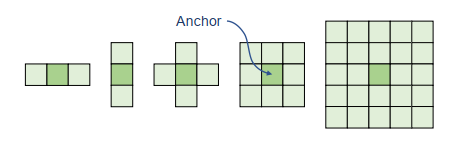
        
        - anchor(고정점): 영상에서 Filtering을 하려는 지점을 가리키는 필터의 중앙점을 사용한다.

## 1 Blurring
- 영상을 흐릿/부드럽게 만드는 작업.
- 픽셀간의 값의 차이를 줄여서 날카로운 엣지가 무뎌지고 영상에 있는 Noise(잡음)이 사라지도록 하는 효과가 있다.
> 엣지(Edge): 물체간의 경계부분으로 contrast(대비)가 크다.

### 1.1 평균값 블러링(Average Blur)
- 주변 픽셀의 평균값을 합성곱하여 적용한다.
- 보통 3 x 3이나 5 x 5 필터를 많이 쓰며 필터의 크기가 커질수록 더 흐릿하게 변환된다.
- 영상이 뭉게져 세밀한 부분이 잘 안보이는 단점이 있다.

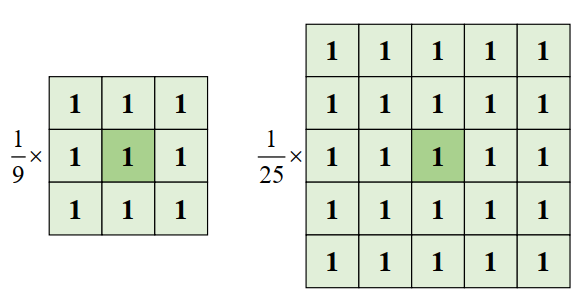
<center>필터 예</center>

- **`cv2.blur(src, ksize)`**
    - src: blur 처리할 입력영상
    - ksize: 필터의 크기. (width, height) 튜플로 지정

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

lenna = cv2.imread('./images/lenna.bmp')

# 직접 필터를 만들어서 적용해보자 
kernel1 = np.ones(shape=(3,3))/9
kernel2 = np.ones(shape=(5,5))/25

# input영상에 합성곲 연산 
dst = cv2.filter2D(lenna, # 입력이미지
            -1, # 반환값(출력결과)의 데이터타입을 지정한다. -1 : 입력영상과 동일한 타입 , 타입지정시 넘파이데이터타입을 사용할수없다. cv2의 상수 - cv2.CV_8U, cv2.CV_32F, cv2.CV_64F
            kernel1 # kernel(필터)행렬을 지정, 이때 float타입이여야 한다. 필터는 정수가 들어가 있으면 안된다. 
            )
dst2 = cv2.filter2D(lenna, -1, kernel2)


In [ ]:
cv2.imshow('src', lenna)
cv2.imshow('dst', dst)
cv2.imshow('dst2',dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# blur 함수 이용 
for 

$$ 평균값블러의 한계 
- 농도에 대한 왜곡 

### 1.2 Gaussian Blur 가우시안 블러

- 대상 픽셀(Anchor)와 가까운 픽셀은 큰 가중치 멀리있는 픽셀은 작은 가중치를 사용해서 평균(가중평균)을 계산해서 필터링 한다.
    - Gaussian 분포(정규분포)의 확률밀도 함수를 사용해 필터에 들어갈 값들을 계산하여 대상픽셀을 기준으로 멀어질 수록 작은 값이 곱해지도록 한다. 
    - 평균은 0으로 하고 표준편차를 조정하여 흐림의 정도를 조절한다. 표준편차 값을 크게할 수록 흐려진다.
    - Filter의 shape은 $(8\sigma + 1,\;8\sigma + 1)$ 나 $(6\sigma + 1,\;6\sigma + 1)$ 으로 정해진다. $\sigma: 표준편차$
- Gaussian Blurring은 blur효과 뿐아니라 노이즈제거에도 많이 사용된다.

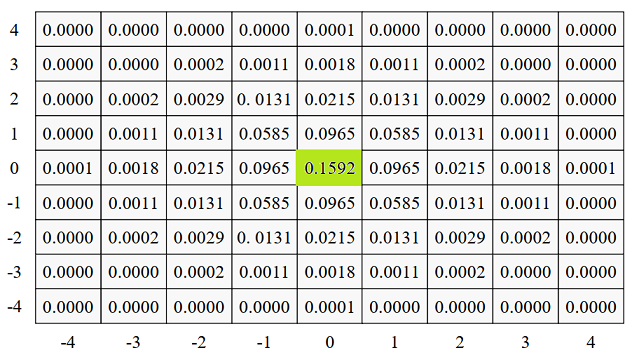

- **`cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)`**
    - src: blur를 적용할 영상. 
    - ksize: 커널크기. (0,0)으로 지정하면 sigma 값에 의해 결정된다. (보통 0,0 으로 설정)
    - sigamX: X축방향 sigma(표준편차) 값
    - sigamY: Y축방향 sigma(표준편차) 값. 생략하면 sigmaX와 같은 값 사용


In [7]:
lenna = cv2.imread('./images/lenna.bmp')

lenna_gb = cv2.GaussianBlur(lenna, (0,0), 3)

cv2.imshow('src',lenna)
cv2.imshow('blur',lenna_gb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
plt.figure(figsize=(20,20))
row, col = 2, 3 

plt.subplot(row, col, 1)
plt.imshow(cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB))
plt.title('origin')

for idx, sigma in enumerate([1, 2, 3, 4, 5], start=2):
    blur_img = cv2.GaussianBlur(lenna, (0,0), sigma)
    plt.subplot(row, col, idx)
    plt.imshow(blur_img[:,:,::-1])
    plt.title(f'blur_sigma{sigma}')
    
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

$ 필기 
- 블러의 한계점은? 전체적으로 이미지가 흐려진다. 
- 왜 흐릿한 느낌이 나는걸까? 엣지부분이 흐릿해지기 때문이다. 
- 잡음은? 경계가 되는 부분은 필터링 안하면 되지않을까? 그러면 윤곽선이 살게된다. 
- 윤곽(엣지)은 살리고 엣지가 아닌 부분은 가우시안필터를 해보자. 

### 잡음 제거
- `cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)`
    - 양방향 필터로 선명도는 유지하면서 bluring을 이용해 노이즈를 제거한다.
    - src: 잡음을 제거할 입력영상
    - d: 필터의 크기 지정. 음수(-1)을 입력하면 sigmaSpace값에 의해 자동 결정된다. 일반적으로 -1을 설정한다.
    - sigmaColor
        - 엣지인지 아닌지를 판단하는 기준값. 지정한 값보다 크면 엣지라고 생각하고 작으면 엣지가 아니라고 생각해 그 지점을 blurring 한다.
        - 이 값을 너무 크게 주면 엣지가 검출이 안되서 그냥 Gaussian Filter 사용하는 것과 같다.
    - sigmaSpace: Gaussian Filter에서 지정한 표준편차

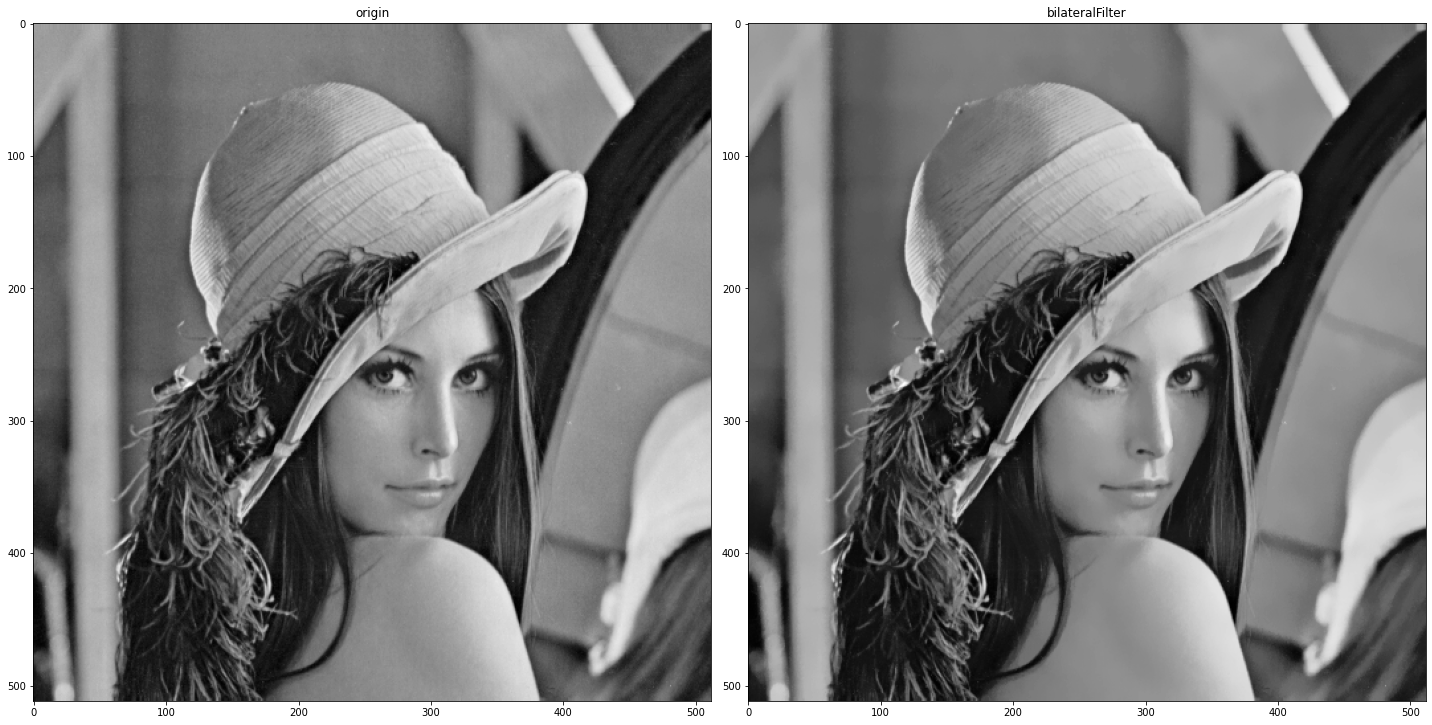

In [11]:
lenna = cv2.imread('./images/Lenna.png', cv2.IMREAD_GRAYSCALE)

dst = cv2.bilateralFilter(lenna, #잡음을 제거할 대상 이미지 
                          d=-1, # 필터크기 , -1: sigmaSpace 설정에의해 자동결정 
                          sigmaColor=5, # 엣지라고 판단할 pixel값의 차이 
                          sigmaSpace=5 # 가우시안필터의 표준편차(시그마) 값 지정 , 크면 클수록 계산속도가 오래걸림
)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(lenna, cmap='gray')
plt.title('origin')

plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title('bilateralFilter')

plt.tight_layout()
plt.show()

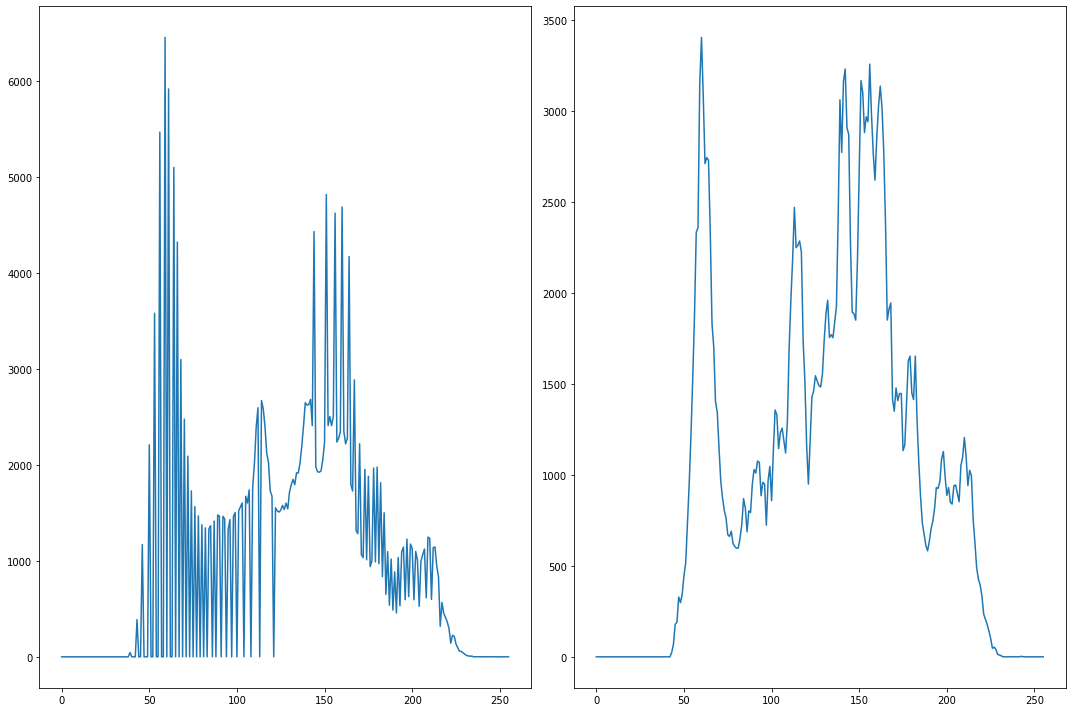

In [17]:
# 히스토그램으로 확인해보자 
hist_org = cv2.calcHist([lenna], [0], None, [256], [0,256])
hist_noise = cv2.calcHist([dst], [0], None, [256], [0,256])

plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.plot(hist_org)

plt.subplot(1,2,2)
plt.plot(hist_noise)

plt.tight_layout()
plt.show()

## 샤프닝(Shappen)
- Blurring의 반대로 흐린영상을 선명한 영상으로 만드는 작업.
- 이미지의 엣지(edge-사물의 윤곽부분)의 대비를 크게 만들어 준다.
    - 이미지 전체를 다 선명하게 하는 게 아니라 윤곽(edge)만 선명하게 만들어 명암비(contrast)를 크게해 선명하게 보이게 한다. 
- Unsharp mask(언샤프 마스크) 필터링
    - Unsharp한 영상을 이용해 Sharp한 영상을 만든다고 해서 Unsharp mask filtering 이라고 한다.
    - 원본 이미지에서 blurring 한 이미지를 뺀다음 그것을 원본이미지에 다시 더한다.
$$
h(x) = f(x)+\alpha(f(x)-\bar{f}(x))\\
f(x): 원본\;이미지\\
\bar{f}(x):\;원본\;이미지를\;blurring한\;이미지\\
\alpha: shappening 정도 조절값
$$

- 제공 함수는 없고 위 공식을 구현한다.

### 이건 뭐구하는것들?
- add(src, src)
- substract(src, src)
- addWeighted(src, src곱할정수, src2, src2곱할정수, 더해줄값) : 가중합을 구함
    - sr*src정수 + src2*src정수 + 더해줄값
- np.clip()

In [1]:
import cv2
rose = cv2.imread('./images/rose.bmp', cv2.IMREAD_GRAYSCALE)

# blurring - 가우시안 
blur_rose = cv2.GaussianBlur(rose, (0,0), 3)
# dst = cv2.subtract(rose, blur_rose) # 뺀값 ==> 엣지확인 
# dst = cv2.addWeighted(rose, 1, blur_rose, -1, 128) # 엠보싱처럼 표현됨 
dst = cv2.addWeighted(rose, 2, blur_rose, -1, 0) # 2*원본 + -1*blur_rose ==>  샤프닝 ==> 엣지의 명함을 높여주는 것 

cv2.imshow('src', rose)
cv2.imshow('blur', blur_rose)
cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
# 알파를 이용해 선명도를 조절해보자 
import cv2
rose = cv2.imread('./images/rose.bmp', cv2.IMREAD_GRAYSCALE)

# blurring - 가우시안 
blur_rose = cv2.GaussianBlur(rose, (0,0), 3)
alpha1 = 0.5
alpha2 = 1
alpha3 = 2
dst1 = cv2.addWeighted(rose, (1+alpha1), blur_rose, -1*alpha1, 0)
dst2 = cv2.addWeighted(rose, (1+alpha2), blur_rose, -1*alpha2, 0)
dst3 = cv2.addWeighted(rose, (1+alpha3), blur_rose, -1*alpha3, 0)

cv2.imshow('src', rose)
# cv2.imshow('blur', blur_rose)
cv2.imshow('dst 0.5', dst1)
cv2.imshow('dst 1.0', dst2)
cv2.imshow('dst 2.0', dst3)

cv2.waitKey(0)
cv2.destroyAllWindows()